In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

In [2]:
import pandas as pd

In [3]:
# Membaca dataset
cust = pd.read_csv('/content/drive/MyDrive/Portfolio/Kalbe Nutritionalist - Data Scientits/Dataset/Customer.csv', sep = ';')
prod = pd.read_csv('/content/drive/MyDrive/Portfolio/Kalbe Nutritionalist - Data Scientits/Dataset/Product.csv', sep = ';')
store = pd.read_csv('/content/drive/MyDrive/Portfolio/Kalbe Nutritionalist - Data Scientits/Dataset/Store.csv', sep = ';')
trans = pd.read_csv('/content/drive/MyDrive/Portfolio/Kalbe Nutritionalist - Data Scientits/Dataset/Transaction.csv', sep = ';')

In [4]:
print(cust.head())
print(cust.info())

   CustomerID  Age  Gender Marital Status Income
0           1   55       1        Married   5,12
1           2   60       1        Married   6,23
2           3   32       1        Married   9,17
3           4   31       1        Married   4,87
4           5   58       1        Married   3,57
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB
None


Note
- Gender : 0 = Wanita, 1 = Pria.
- Income : ubah tipe data menjadi int dan menambahkan 0 sebanyak 4kali (0000).
- Marital Status Diisi (3 null).

In [5]:
# Mengubah tipe data incone menjadi int
cust['Income'] = cust['Income'].astype(str)
cust['Income'] = cust['Income'].str.replace(',', '')
cust['Income'] = cust['Income'].astype(int)

# Mengubah value gender dari 0 menjadi wanita, 1 menjadi pria
gender_map = {0: 'Wanita', 1 : 'Pria'}
cust['Gender'] = cust['Gender'].map(gender_map)
cust.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,Pria,Married,512
1,2,60,Pria,Married,623
2,3,32,Pria,Married,917
3,4,31,Pria,Married,487
4,5,58,Pria,Married,357


In [6]:
# Mengisi Marital Status yang kosong
mode_marital = cust['Marital Status'].mode()[0]

# Mengisi nilai kosong dengan mode
cust['Marital Status'].fillna(mode_marital, inplace=True)

cust['Marital Status'].isnull().sum()

0

In [7]:
# Menambahkan angka 0000 pada income agar nilainya presisi (jutaan)
cust['Income'] = cust['Income'].apply(lambda x: f"{x}0000")
cust.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,Pria,Married,5120000
1,2,60,Pria,Married,6230000
2,3,32,Pria,Married,9170000
3,4,31,Pria,Married,4870000
4,5,58,Pria,Married,3570000


In [8]:
# Mengubah tipe data Income menjadi int
cust['Income'] = cust['Income'].astype('int64')
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    object
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [9]:
print(prod.head())
print(prod.info())

  ProductID   Product Name  Price
0        P1      Choco Bar   8800
1        P2  Ginger Candy    3200
2        P3       Crackers   7500
3        P4    Potato Chip  12000
4        P5       Thai Tea   4200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes
None


In [10]:
print(store.head())
print(store.info())

   StoreID         StoreName GroupStore           Type   Latitude   Longitude
0        1     Prima Tendean      Prima   Modern Trade       -6,2  106,816666
1        2  Prima Kelapa Dua      Prima   Modern Trade  -6,914864  107,608238
2        3        Prima Kota      Prima   Modern Trade  -7,797068  110,370529
3        4       Gita Ginara       Gita  General Trade  -6,966667  110,416664
4        5           Bonafid       Gita  General Trade  -7,250445  112,768845
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes
None


In [11]:
print(trans.head())
print(trans.info())

  TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0       TR11369         328  01/01/2022        P3   7500    4        30000   
1       TR16356         165  01/01/2022        P9  10000    7        70000   
2        TR1984         183  01/01/2022        P1   8800    4        35200   
3       TR35256         160  01/01/2022        P1   8800    7        61600   
4       TR41231         386  01/01/2022        P9  10000    1        10000   

   StoreID  
0       12  
1        1  
2        4  
3        4  
4        4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6 

In [12]:
# Cek nilai kosong
trans.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [13]:
# Mengubah tipe data date dari object menjadi datetime
trans['Date'] = pd.to_datetime(trans['Date'], format='%d/%m/%Y')

# Menggabungkan 4 dataset menjadi 1
df = trans.merge(prod, on='ProductID', how='left') \
          .merge(store, on='StoreID', how='left') \
          .merge(cust, on='CustomerID', how='left')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36,Wanita,Married,10530000
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,Yoghurt,10000,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",44,Pria,Married,14580000
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,Choco Bar,8800,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",27,Pria,Single,180000
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,Choco Bar,8800,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",48,Pria,Married,12570000
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,Yoghurt,10000,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",33,Wanita,Married,6950000


In [14]:
# Mengubah nama kolom price_x menjadi price
df.rename(columns={'Price_x' : 'Price'}, inplace = True)

# Menghapus kolom yang tidak perlu
df = df.drop(columns=['Price_y', 'Latitude', 'Longitude'])

print(df.head())
print(df.info())

  TransactionID  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
0       TR11369         328 2022-01-01        P3   7500    4        30000   
1       TR16356         165 2022-01-01        P9  10000    7        70000   
2        TR1984         183 2022-01-01        P1   8800    4        35200   
3       TR35256         160 2022-01-01        P1   8800    7        61600   
4       TR41231         386 2022-01-01        P9  10000    1        10000   

   StoreID Product Name       StoreName GroupStore           Type  Age  \
0       12     Crackers  Prestasi Utama   Prestasi  General Trade   36   
1        1      Yoghurt   Prima Tendean      Prima   Modern Trade   44   
2        4    Choco Bar     Gita Ginara       Gita  General Trade   27   
3        4    Choco Bar     Gita Ginara       Gita  General Trade   48   
4        4      Yoghurt     Gita Ginara       Gita  General Trade   33   

   Gender Marital Status    Income  
0  Wanita        Married  10530000  
1    Pria        M

# Time Series Regression Using ARIMA

In [15]:
# Groupby dan agregasi data berdasarkan tanggal
daily_qty = df.groupby('Date')['Qty'].sum()

# Memastikan tanggal dalam urutan waktu yang benar
daily_qty = daily_qty.sort_index()

# Menentukan frekuensi harian
daily_qty.index.freq = 'D'

# Memisahkan data menjadi data latihan dan data uji
train_size = int(0.8 * len(daily_qty))
train_data = daily_qty[:train_size]
test_data = daily_qty[train_size:]

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Membuat model ARIMA
order = (5, 1, 1)  # Nilai ini dapat disesuaikan
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Melakukan prediksi pada data uji
predictions = model_fit.forecast(steps=len(test_data))

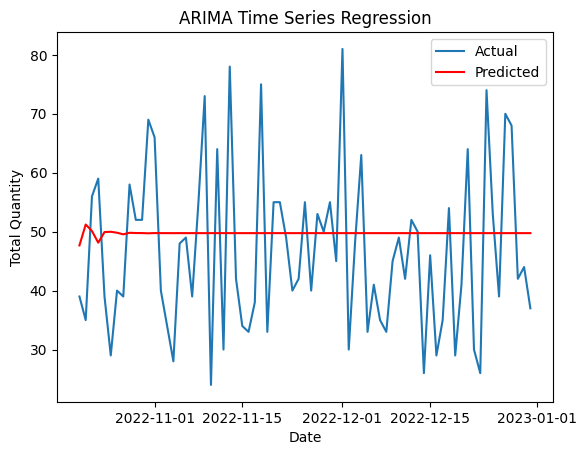

In [17]:
import matplotlib.pyplot as plt

# Menampilkan hasil prediksi
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('ARIMA Time Series Regression')
plt.legend()
plt.show()

# Clustering

In [20]:
# Grouping berdasarkan CustomerID
aggregation = {
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}

# Agregasi Data
cluster_data = df.groupby('CustomerID').agg(aggregation).reset_index()

# Menghilangkan kolom CustomerID untuk keperluan clustering
X = cluster_data.drop('CustomerID', axis=1)

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Menentukan jumlah cluster yang diinginkan
num_clusters = 3

# Membuat objek KMeans dengan n_init yang ditetapkan
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)

# Melakukan proses clustering dengan KMeans
cluster_labels = kmeans.fit_predict(X_scaled)

# Menambahkan kolom cluster_labels ke dalam cluster_data
cluster_data['Cluster'] = cluster_labels

In [23]:
print(cluster_data)

     CustomerID  TransactionID  Qty  TotalAmount  Cluster
0             1             17   60       623300        1
1             2             13   57       392300        1
2             3             15   56       446200        1
3             4             10   46       302500        2
4             5              7   27       268600        0
..          ...            ...  ...          ...      ...
442         443             16   59       485100        1
443         444             18   62       577700        1
444         445             18   68       587200        1
445         446             11   42       423300        2
446         447             13   42       439300        2

[447 rows x 5 columns]


In [24]:
data = pd.DataFrame(cluster_data)
data.head()

,CustomerID,TransactionID,Qty,TotalAmount,Cluster
0,1,17,60,623300,1
1,2,13,57,392300,1
2,3,15,56,446200,1
3,4,10,46,302500,2
4,5,7,27,268600,0


In [25]:
data['Cluster'].value_counts()

2    202
0    135
1    110
Name: Cluster, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil clustering menggunakan scatter plot
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']  # Sesuaikan jumlah cluster dengan warna yang diinginkan

for cluster_num, color in zip(range(num_clusters), colors):
    cluster_points = cluster_data[cluster_data['Cluster'] == cluster_num]
    plt.scatter(cluster_points['Qty'], cluster_points['TotalAmount'], color=color, label=f'Cluster {cluster_num}')

plt.xlabel('Qty')
plt.ylabel('Total Amount')
plt.title('Clustering Results')
plt.legend()
plt.show()